In [1]:
import numpy as np
import pandas as pd

import time
import random
import pickle
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix

from catboost import CatBoostClassifier

In [2]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

***

# FUNCTIONS:

### Fn1: RETURNS CLASSIFICATIONS REPORT & PLOTS:

In [3]:
def retrn_classification_report(model, X_train, y_train, X_test, y_test):
    
    def retrn_cm_elements_plot(model, data, labels, train_or_test):

        y_pred = model.predict(data)
        cm = confusion_matrix(labels, y_pred)

        true_pos   = cm[1, 1]
        true_neg   = cm[0, 0]
        n_pos_pred = cm[:, 1].sum()
        n_neg_pred = cm[:, 0].sum()
        n_pos = cm[1, :].sum()
        n_neg = cm[0, :].sum()
        recal_pos = true_pos/n_pos
        recal_neg = true_neg/n_neg
        preci_pos = true_pos/n_pos_pred
        preci_neg = true_neg/n_neg_pred

        xs = ['POS_pred', 'NEG_pred']
        ys = [n_pos_pred, n_neg_pred]
        ys1 = [true_pos, true_neg]  

        kdims = train_or_test
        vdims = 'YELLOW = FALSE'
        plot1 = hv.Bars((xs, ys), kdims = kdims, vdims = vdims).options(alpha = 0.8, fig_size = 125, color = 'y')
        plot2 = hv.Bars((xs, ys1), vdims = vdims).options(alpha = 0.6, color = 'g')
        plot = plot1 * plot2

        return plot, true_pos, true_neg, n_pos, n_neg, preci_neg, preci_pos, recal_neg, recal_pos 

    def retrn_report(train_true_pos, train_true_neg, train_n_pos, train_n_neg,
                     train_preci_neg, train_preci_pos, train_recal_neg, train_recal_pos,
                     test_true_pos, test_true_neg, test_n_pos, test_n_neg,
                     test_preci_neg, test_preci_pos, test_recal_neg, test_recal_pos):

        train_acc = (train_true_pos + train_true_neg)/(train_n_pos + train_n_neg)
        test_acc = (test_true_pos + test_true_neg)/(test_n_pos + test_n_neg)
        df_acc = pd.DataFrame([train_acc]).assign(x = [test_acc])
        df_acc.columns = ['train', 'test']
        df_acc.index = ['acc'] 
        df_acc = df_acc*100

        train_precision_col = np.array([train_preci_neg, train_preci_pos]).reshape(2, 1)
        train_recal_col = np.array([train_recal_neg, train_recal_pos]).reshape(2, 1)
        test_precision_col = np.array([test_preci_neg, test_preci_pos]).reshape(2, 1)
        test_recal_col = np.array([test_recal_neg, test_recal_pos]).reshape(2, 1)

        df_classifi_report = pd.DataFrame(train_precision_col).assign(x = train_recal_col)
        df_classifi_report = df_classifi_report.assign(y = test_precision_col, z = test_recal_col)
        df_classifi_report.columns = ['preci_train', 'recal_train', 'preci_test', 'recal_test']
        df_classifi_report.index = ['neg', 'pos'] 
        df_classifi_report = df_classifi_report*100

        return df_acc, df_classifi_report

    listO_listO_params = []
    c = 0
    for data, labels in [(X_train, y_train), (X_test, y_test)]:
        train_or_test = 'train' if c == 0 else 'test'
        listO_params = list(retrn_cm_elements_plot(model, data, labels, train_or_test))
        listO_listO_params.append(listO_params)
        c +=1

    plot_train, plot_test = listO_listO_params[0][0], listO_listO_params[1][0]
    plot_TRAIN_TEST = plot_train + plot_test
    listO_listO_params = listO_listO_params[0][1:] + listO_listO_params[1][1:] 
    
    df_acc, df_classifi_report =  retrn_report(*listO_listO_params)  
    
    return df_acc, df_classifi_report, plot_TRAIN_TEST


### Fn2: RETURNS CROSS VALIDATION REPORT:

In [4]:
def retrn_cv_report(grid):
    
    mean_train_score = grid.cv_results_['mean_train_score']
    mean_test_score  = grid.cv_results_['mean_test_score']    
    diff_train_test = mean_train_score - mean_test_score
    std_dev_train  = grid.cv_results_['std_train_score'] 
    std_dev_test  = grid.cv_results_['std_test_score'] 
    params = grid.cv_results_['params']
    
    df = pd.DataFrame(mean_train_score, columns = ['mean_train_score'])
    df = df.assign(mean_test_score = mean_test_score, diff_train_test = diff_train_test)
    df = df.assign(std_dev_train = std_dev_train, std_dev_test = std_dev_test)*100
    df = df.assign(params = params)
    df_cv_scores = df
    
    return df_cv_scores
    

***

# DATA:

In [5]:
X = np.load('listO_tf_w2v_textVec.npy')
y = pd.read_csv('df_adjective_text.csv').score
y = np.array([0 if i == 'negative' else 1 for i in y]).reshape(len(y), 1)

df = pd.DataFrame(X).assign(y = y)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.049288,0.144348,0.068937,0.071554,-0.012273,0.071699,0.118965,-0.115485,-0.027418,0.177681,...,0.083842,-0.196109,0.121693,-0.024098,0.000053,0.046669,-0.145708,0.050596,0.068606,1
1,-0.174608,0.117416,0.169675,0.227362,-0.051570,-0.035016,0.136339,-0.008501,0.050530,0.161554,...,-0.222631,-0.135522,-0.047681,0.070261,0.089716,-0.066281,-0.044970,-0.001644,-0.049291,0
2,-0.097160,-0.043842,0.059814,0.175192,-0.066800,0.094058,0.147436,-0.045031,-0.092099,0.180388,...,-0.090968,0.017774,0.068089,0.019854,0.011404,0.008328,-0.029282,-0.000773,0.066036,1
3,0.066151,-0.009636,0.072102,0.218845,-0.144453,0.050973,0.178692,-0.210295,-0.084385,0.152354,...,-0.201746,0.006236,0.091028,-0.075942,0.159780,0.068571,0.152060,0.221986,-0.001751,0
4,0.055556,-0.046451,-0.084545,0.201347,-0.098793,0.012062,0.057963,-0.124287,-0.115966,0.176837,...,-0.071542,-0.153533,-0.068990,0.037154,0.050212,0.120553,0.117851,-0.047633,-0.063400,1


In [6]:
Counter(y.squeeze())

Counter({1: 307016, 0: 57103})

### TRAIN - TEST SPLIT:

In [7]:
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = df.y.values[train_index], df.y.values[test_index]

df.shape, X_train.shape, X_test.shape

((364119, 301), (291295, 300), (72824, 300))

***

# 1. GRIDSEARCH WITH CROSS VALIDATION - ITER 1(n_estimators = 500):

In [10]:
pipe = Pipeline([('CB', CatBoostClassifier(class_weights = [1, 0.20], early_stopping_rounds=50, 
                                           verbose = False, random_seed=7, used_ram_limit ='8gb'))])

param_grid1 = {'CB__n_estimators'   : [500], 
               'CB__bootstrap_type' : ['Bayesian'],
               'CB__max_depth'      : [4, 6, 8, 10]}
 
grid1 = GridSearchCV(pipe, param_grid1, n_jobs = -1, cv = 3, return_train_score=True)

In [11]:
data = X_train
labels = y_train

%time grid1.fit(data, labels)

Wall time: 59min 34s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CB', <catboost.core.CatBoostClassifier object at 0x0000000057B53128>)]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'CB__n_estimators': [500], 'CB__bootstrap_type': ['Bayesian'], 'CB__max_depth': [4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
# joblib.dump(grid1, 'CB_grid1.joblib') 

['CB_grid1.joblib']

In [8]:
grid1 = joblib.load('CB_grid1.joblib') 

### CROSS VALIDATION REPORT:

In [9]:
grid = grid1
df_cv_scores_grid1 = retrn_cv_report(grid)
df_cv_scores_grid1

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,77.432843,76.189430,1.243413,0.104229,0.052143,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
1,80.548757,77.674866,2.873891,0.166806,0.063199,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
2,86.780927,80.162722,6.618205,0.101977,0.063702,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
3,94.371342,83.143892,11.227450,0.128213,0.054698,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."


# 2. GRIDSEARCH WITH CROSS VALIDATION - ITER 2(n_estimators = 250):

In [15]:
pipe = Pipeline([('CB', CatBoostClassifier(class_weights = [1, 0.20], early_stopping_rounds=50, 
                                           verbose = False, random_seed=7, used_ram_limit ='8gb'))])

param_grid2 = {'CB__n_estimators'   : [250], 
               'CB__bootstrap_type' : ['Bayesian'],
               'CB__max_depth'      : [2, 4, 6, 8, 10]}
 
grid2 = GridSearchCV(pipe, param_grid2, n_jobs = -1, cv = 3, return_train_score=True)

In [16]:
data = X_train
labels = y_train

%time grid2.fit(data, labels)

Wall time: 38min 52s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CB', <catboost.core.CatBoostClassifier object at 0x000000001C7250B8>)]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'CB__n_estimators': [250], 'CB__bootstrap_type': ['Bayesian'], 'CB__max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
joblib.dump(grid2, 'CB_grid2.joblib') 

['CB_grid2.joblib']

In [19]:
grid2 = joblib.load('CB_grid2.joblib') 

In [20]:
grid = grid2
df_cv_scores_grid2 = retrn_cv_report(grid2)
df_cv_scores_grid2

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,74.962152,74.468837,0.493315,0.259354,0.188607,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
1,76.863489,75.715340,1.148149,0.140909,0.086806,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
2,79.741328,77.047323,2.694005,0.147895,0.055020,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
3,85.365866,79.092329,6.273537,0.079370,0.055092,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
4,93.535248,82.120531,11.414717,0.168509,0.100582,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."


# 3. GRIDSEARCH WITH CROSS VALIDATION - ITER 3(n_estimators = 750):

In [19]:
pipe = Pipeline([('CB', CatBoostClassifier(class_weights = [1, 0.20], early_stopping_rounds=50, 
                                           verbose = False, random_seed=7, used_ram_limit ='8gb'))])

param_grid3 = {'CB__n_estimators'   : [750], 
               'CB__bootstrap_type' : ['Bayesian'],
               'CB__max_depth'      : [2, 4, 6, 8, 10]}
 
grid3 = GridSearchCV(pipe, param_grid3, n_jobs = -1, cv = 3, return_train_score=True)

In [20]:
data = X_train
labels = y_train

%time grid3.fit(data, labels)

Wall time: 1h 32min 29s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CB', <catboost.core.CatBoostClassifier object at 0x0000000053DBCCC0>)]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'CB__n_estimators': [750], 'CB__bootstrap_type': ['Bayesian'], 'CB__max_depth': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
joblib.dump(grid3, 'CB_grid3.joblib') 

['CB_grid3.joblib']

In [13]:
grid3 = joblib.load('CB_grid3.joblib') 

In [14]:
grid = grid3
df_cv_scores_grid3 = retrn_cv_report(grid3)
df_cv_scores_grid3

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,75.374277,74.854357,0.519920,0.152863,0.078051,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
1,77.631268,76.221700,1.409568,0.170385,0.079486,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
2,80.958135,77.858872,3.099264,0.104447,0.099637,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
3,87.403148,80.472717,6.930432,0.102074,0.102599,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
4,94.742615,83.536964,11.205651,0.128081,0.071113,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."


# 4. CONSOLIDATED CROSS VALIDATION REPORT:

In [21]:
df_cv_scores = pd.concat([df_cv_scores_grid1, df_cv_scores_grid2, df_cv_scores_grid3])
df_cv_scores.index = range(len(df_cv_scores))
df_cv_scores

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,77.432843,76.189430,1.243413,0.104229,0.052143,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
1,80.548757,77.674866,2.873891,0.166806,0.063199,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
2,86.780927,80.162722,6.618205,0.101977,0.063702,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
3,94.371342,83.143892,11.227450,0.128213,0.054698,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
4,74.962152,74.468837,0.493315,0.259354,0.188607,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
5,76.863489,75.715340,1.148149,0.140909,0.086806,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
6,79.741328,77.047323,2.694005,0.147895,0.055020,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
7,85.365866,79.092329,6.273537,0.079370,0.055092,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
8,93.535248,82.120531,11.414717,0.168509,0.100582,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
9,75.374277,74.854357,0.519920,0.152863,0.078051,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."


In [22]:
np.save('arryO_cv_scores', df_cv_scores.values, allow_pickle=True, fix_imports=True)

### FILTERATION FOR FEASIBLE MODELS:

In [23]:
generalization_threshold = 3
variance_threshold = 0.5
accuracy_threshold = 76

condition1 = abs(df_cv_scores['mean_train_score'] - df_cv_scores['mean_test_score']) <= generalization_threshold
condition2 = df_cv_scores['std_dev_test'] <= variance_threshold
condition3 = df_cv_scores['mean_test_score'] >= accuracy_threshold


df_feasible_models = df_cv_scores[condition1 & condition2 & condition3]
df_feasible_models

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,77.432843,76.189430,1.243413,0.104229,0.052143,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
1,80.548757,77.674866,2.873891,0.166806,0.063199,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
6,79.741328,77.047323,2.694005,0.147895,0.055020,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."
10,77.631268,76.221700,1.409568,0.170385,0.079486,"{'CB__bootstrap_type': 'Bayesian', 'CB__max_de..."


# 5. CHOOSING 2 MODELS :
- MODEL1 (INDEX 0, WHICH GENERALIZE BEST AMOUNG df_feasible_models):
- MODEL2 (INDEX 1, WHICH HAS HIGHEST TEST SCORE AMOUNG df_feasible_models):

In [65]:
model1 = df_feasible_models.params.values[0]
model1

{'CB__bootstrap_type': 'Bayesian', 'CB__max_depth': 4, 'CB__n_estimators': 500}

In [68]:
model2 = df_feasible_models.params.values[1]
model2

{'CB__bootstrap_type': 'Bayesian', 'CB__max_depth': 6, 'CB__n_estimators': 500}

# 6. TRAINING MODEL1:

In [69]:
pipe = Pipeline([('CB', CatBoostClassifier(class_weights = [1, 0.20], early_stopping_rounds=50, 
                                           verbose = False, random_seed=7, used_ram_limit ='8gb'))])

param_grid_model1 = {'CB__n_estimators'   : [500], 
                     'CB__bootstrap_type' : ['Bayesian'],
                     'CB__max_depth'      : [4]}
 
grid_model1 = GridSearchCV(pipe, param_grid_model1, n_jobs = -1, cv = 2, return_train_score=True)

In [70]:
data = X_train
labels = y_train

%time grid_model1.fit(data, labels)

Wall time: 3min 19s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CB', <catboost.core.CatBoostClassifier object at 0x0000000005421550>)]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'CB__n_estimators': [500], 'CB__bootstrap_type': ['Bayesian'], 'CB__max_depth': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### CLASSIFICATION REPORT MODEL1:

In [71]:
model = grid_model1

df_acc_MODEL1, df_report_MODEL1, plot_TRAIN_TEST_MODEL1 = retrn_classification_report(model, X_train, y_train, X_test, y_test)

In [72]:
df_acc_MODEL1

,train,test
acc,77.117699,76.29353


In [73]:
df_report_MODEL1

,preci_train,recal_train,preci_test,recal_test
neg,37.428520,68.344206,35.902138,65.143157
pos,93.043583,78.749496,92.359072,78.367506


:Layout
   .Overlay.I  :Overlay
      .Bars.I  :Bars   [train]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
   .Overlay.II :Overlay
      .Bars.I  :Bars   [test]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
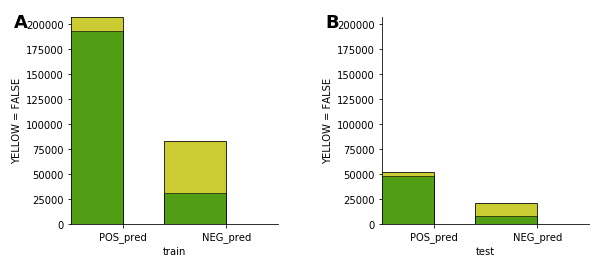

In [74]:
plot_TRAIN_TEST_MODEL1

# 7. TRAINING MODEL2:

In [75]:
pipe = Pipeline([('CB', CatBoostClassifier(class_weights = [1, 0.20], early_stopping_rounds=50, 
                                           verbose = False, random_seed=7, used_ram_limit ='8gb'))])

param_grid_model2 = {'CB__n_estimators'   : [500], 
                     'CB__bootstrap_type' : ['Bayesian'],
                     'CB__max_depth'      : [6]}
 
grid_model2 = GridSearchCV(pipe, param_grid_model2, n_jobs = -1, cv = 2, return_train_score=True)

In [76]:
data = X_train
labels = y_train

%time grid_model2.fit(data, labels)

Wall time: 4min 15s


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('CB', <catboost.core.CatBoostClassifier object at 0x000000005345DCF8>)]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'CB__n_estimators': [500], 'CB__bootstrap_type': ['Bayesian'], 'CB__max_depth': [6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### CLASSIFICATION REPORT MODEL2:

In [77]:
model = grid_model2

df_acc_MODEL2, df_report_MODEL2, plot_TRAIN_TEST_MODEL2 = retrn_classification_report(model, X_train, y_train, X_test, y_test)

In [78]:
df_acc_MODEL2

,train,test
acc,79.79265,77.573327


In [79]:
df_report_MODEL2

,preci_train,recal_train,preci_test,recal_test
neg,41.645433,71.914540,37.428966,64.013659
pos,93.959795,81.257914,92.287628,80.095435


:Layout
   .Overlay.I  :Overlay
      .Bars.I  :Bars   [train]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
   .Overlay.II :Overlay
      .Bars.I  :Bars   [test]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
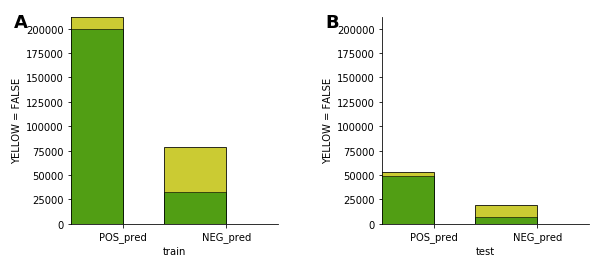

In [80]:
plot_TRAIN_TEST_MODEL2

***

# OBSERVATIONS & CONCLUSIONS:

- FROM THE CLASSIFICATION REPORTS FOR MODELS 1 & 2, WE SEE THAT BOTH MODELS HAVE PERFORMANCES VERY CLOSE TO EACH OTHER.
- MODEL 1 GIVES AN ACCURACY OF 76.29% WITH A NEG RECALL OF 65.14% & POS RECALL OF 78.36%.
- MODEL 2 GIVES AN ACCURACY OF 77.57% WITH A NEG RECALL OF 64.01% & POS RECALL OF 80.09%.